In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC

In [3]:
# reading dataset
data_link = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
iris_data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [5]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data.columns = columns
iris_data.head()


,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
iris_data.shape

(149, 5)

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Checking missing values
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

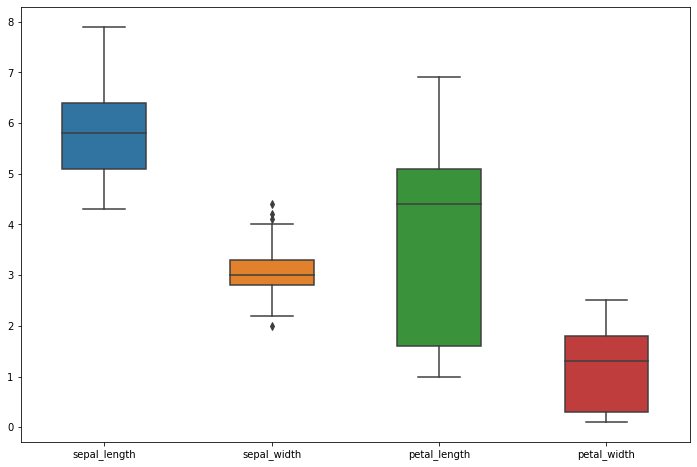

In [10]:
plt.figure(figsize = (12, 8))
sns.boxplot(data = iris_data, width = 0.5, fliersize = 5)
plt.show()

In [11]:
# Checking correlation
corr = iris_data.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


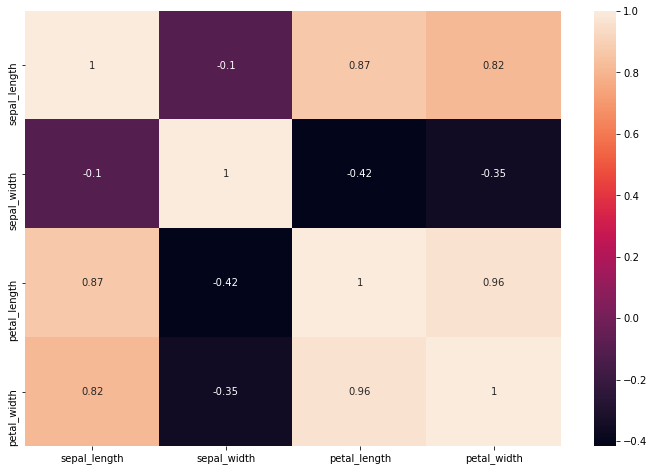

In [12]:
# PLotting it into Heatmap
plt.figure(figsize = (12, 8))
sns.heatmap(corr, annot = True)
plt.show()

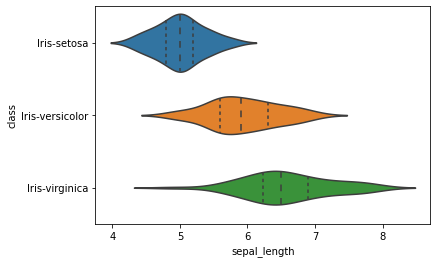

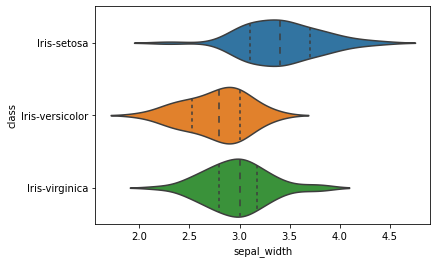

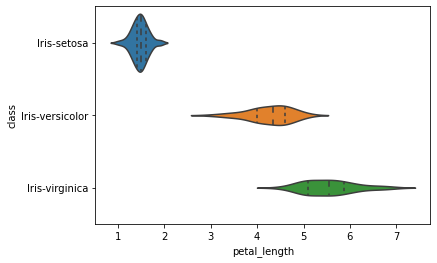

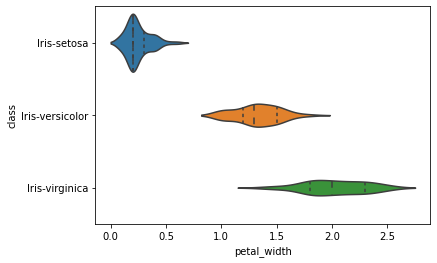

In [13]:
# Violin Plot
sns.violinplot(y='class', x='sepal_length', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='sepal_width', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_length', data=iris_data, inner='quartile')
plt.show()
sns.violinplot(y='class', x='petal_width', data=iris_data, inner='quartile')
plt.show()

In [14]:
# Separate features from target values 
data = iris_data.values
X = data[:,0:4]
Y = data[:,4]

In [15]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) 
for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

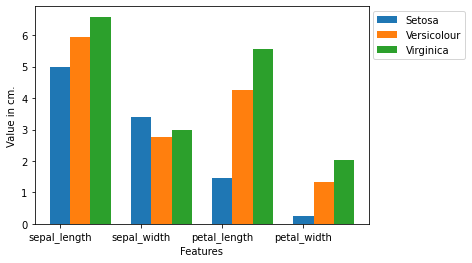

In [16]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [17]:
# Building the Model
# Data Splitting
X = iris_data.drop(['class'], axis = 1)
y = iris_data['class']

In [19]:
#Model training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [27]:
prediction = model.predict(X_test)

In [30]:
# Printing Accuracy Score and Classification Report for our model
print('Test Accuracy Score is: ', accuracy_score(y_test, prediction))
print('\n')


Test Accuracy Score is:  0.9333333333333333




In [31]:
print('Classification Report:\n ', classification_report(y_test, prediction))

Classification Report:
                   precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [25]:
#testing model

X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [28]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)
# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)